In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

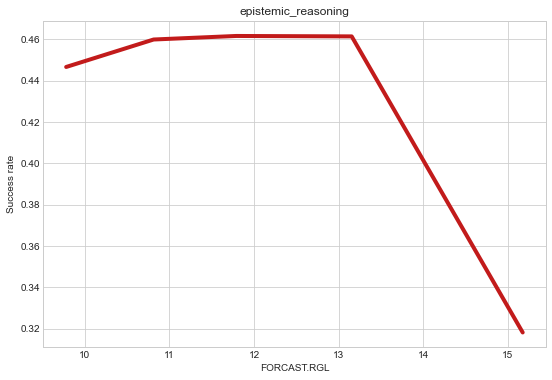

In [5]:
task = "epistemic_reasoning"
benchmark = "bigbench"
meta_features = ["uncertainty","time","space","vocabulary","noise","modality","composition","anaphora","negation"]
readability_metrics = ['Scrabble','TTR', 'FORCAST.RGL', 'K','Flesch','FOG','SMOG']
feature = "FORCAST.RGL" #CHANGE BY THE ONE YOU WANT TO PLOT


if feature in meta_features:
    data = pd.read_csv(f'./{benchmark}/{task}/{task}_features_post.csv')
    del data["sentence"]
    #Drop targets or target_values
    data = data.drop(data[data['level_ID'] == 2].index)
    #Agrupar por instancia
    df_grouped = data.groupby('instance_ID').mean()

    df2 = pd.read_csv(f'./{benchmark}/{task}/{task}.csv',usecols=["instance_ID","correct"])

    df2_grouped = df2.groupby('instance_ID').mean()

    df = pd.concat([df_grouped, df2_grouped],axis=1, join='outer')
    del df["level_ID"]
    del df["sentence_ID"]
    df=df.rename(columns = {'correct':'Dffclt'})
    df["Dffclt"] = 1 - df["Dffclt"]

else:
    data1 = pd.read_csv(f'./{benchmark}/{task}/LexicalDiversity_METRICS.csv',usecols= ["K","TTR"])
    data2 = pd.read_csv(f'./{benchmark}/{task}/LexicalReadability_METRICS.csv',usecols=["Flesch","Scrabble","FOG","SMOG","FORCAST.RGL"])
    data3 = pd.read_csv(f'./{benchmark}/{task}/{task}.csv',usecols=["instance_ID","correct"])

    data3= data3.groupby('instance_ID',as_index=False).mean()

    df = pd.concat([data1, data2,data3],axis=1,join="outer")
    df = df.set_index("instance_ID")

    df=df.rename(columns = {'correct':'Dffclt'})
    df["Dffclt"] = 1 - df["Dffclt"]



num_bins = 5
df_met = df[[feature, 'Dffclt']]
df_met = df_met.groupby(feature,as_index = False).mean()

df_sorted = df_met.sort_values(by=feature)
df_grouped = df_sorted.groupby(np.arange(len(df_sorted))//(len(df_sorted)//(num_bins-1))).agg('mean')

plt.rcParams.update({'font.size': 10})
plt.style.use('seaborn-whitegrid')
df_grouped.plot(kind='line', x=feature, y='Dffclt',figsize=(9,6),color='#c21b1b',linewidth=4, legend=None)
plt.ylabel('Success rate')
plt.title(f"{task}")
# plt.savefig(f'./{meta_feature}_{num_bins}bins_{task}.pdf')
plt.show()